<a href="https://colab.research.google.com/github/luciekash/Clustering-Analysis-with-Python-Project/blob/main/Clustering_Analysis_with_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform wine segmentation.

### b) Defining the Metric for Success

The project will be a success when we are able to create clusters with clear boundaries.

### c) Understanding the Context 

Champagne Company is a leading wine company that specialises in the importation and
distribution of premium and super-premium wines, champagnes and spirits within the
East African region. The main goal of the company is to make the most exclusive brands
of wine more accessible at an affordable price. The company wants to satisfy the
growing local demand for specialised products and the ever-increasing tourism industry
where guests don ́t want to settle for less.

### d) Recording the Experimental Design

- Define the Research Question
- Data Importation
- Data Exploration
- Data Cleaning
- Data Analysis (Univariate and Bivariate)
- Data Preparation
- Data Modeling
- Model Evaluation
- Recommendations / Conclusion
- Challenging your Solution

### e) Data Relevance

The dataset is appropriate to answering the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)

In [ ]:
df = pd.read_csv('https://bit.ly/2UBJERh')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# check dataset shape
df.shape

(178, 13)

In [ ]:
# chekc data types
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [ ]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(178, 13)

In [ ]:
# check for missing data
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

## <font color='#2F4F4F'>3. Data Analysis</font>

In [ ]:
# get descriptive statistics
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


What do you notice about the descriptive statistics, particularly the ranges? What does this tell you?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

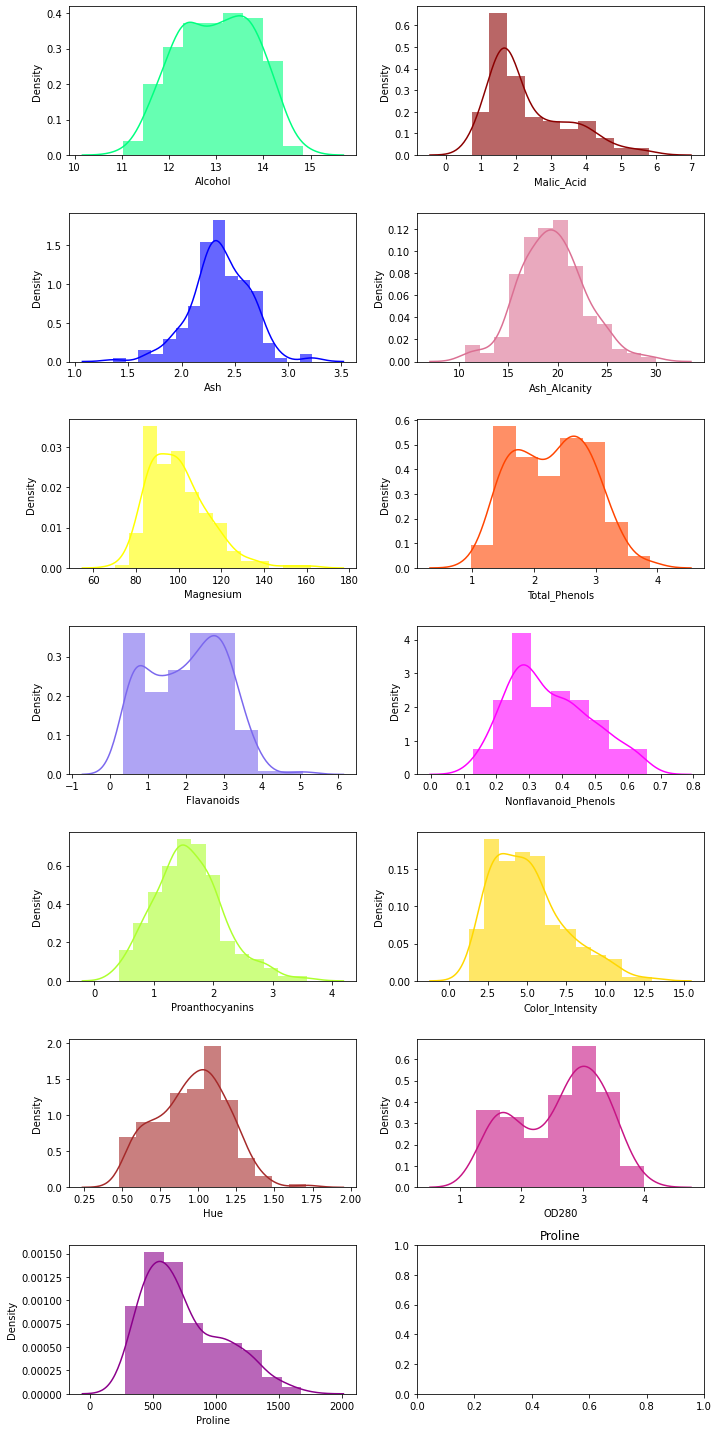

In [ ]:
# previewing the histograms of each variable
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 20))

cols = df.columns.to_list()
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700', '#A52A2A', '#C71585', '#8B008B']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.distplot(df[col], ax = ax, color = color, hist_kws = dict(alpha = 0.6))
    plt.title(col)
    
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

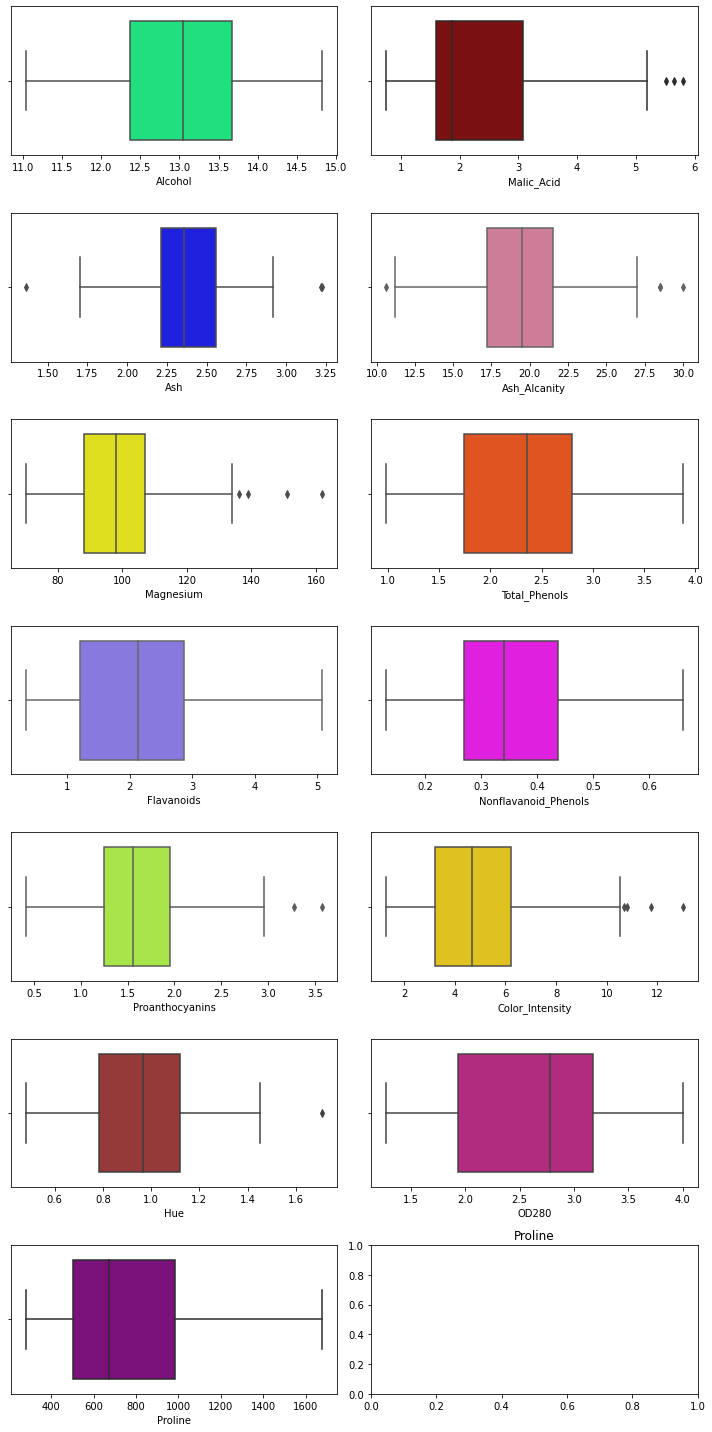

In [ ]:
# previewing the boxplots of each variable
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 20))

cols = df.columns.to_list()
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700', '#A52A2A', '#C71585', '#8B008B']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.boxplot(df[col], ax = ax, color = color)
    plt.title(col)
    
plt.tight_layout()

Provide your interpretations.

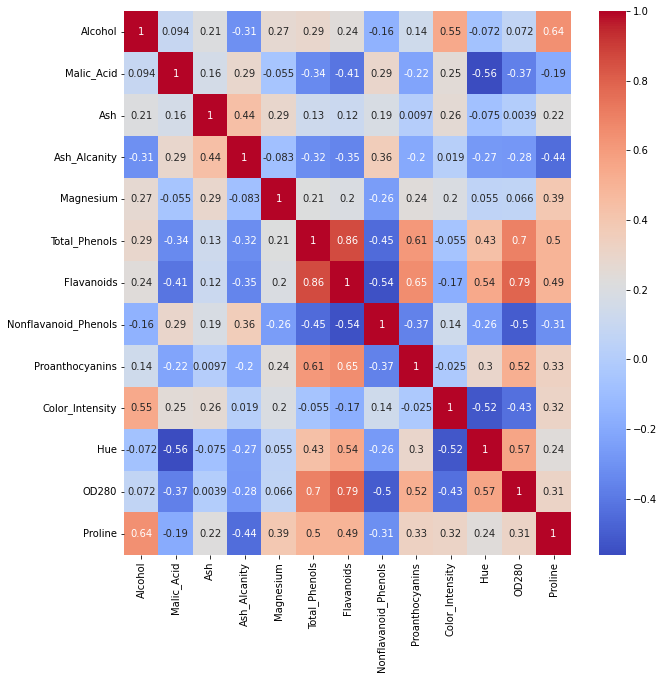

In [ ]:
# previewing the correlations between the variables
corr = df.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

What do you notice?

## <font color='#2F4F4F'>4. Data Modeling</font>

In [ ]:
# set all the features into X
X = df.iloc[:,].values

In [ ]:
# scale our features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fit and transform our features
norm = StandardScaler().fit(X) 
X = norm.transform(X)

### 4.1 KMeans Clustering

In [ ]:
# fitting KMeans with 5 clusters
from sklearn.cluster import KMeans

clusterer = KMeans(5, random_state=0)
clusterer.fit(X)

# getting the cluster labels
clusterer.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 3, 1, 3,
       3, 4, 4, 4, 4, 3, 4, 2, 3, 4, 4, 4, 4, 3, 4, 3, 1, 0, 3, 4, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 2, 4, 4, 3, 3, 4, 4, 3, 4, 4, 1, 4, 1, 4, 3,
       3, 3, 1, 1, 1, 1, 4, 4, 4, 4, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

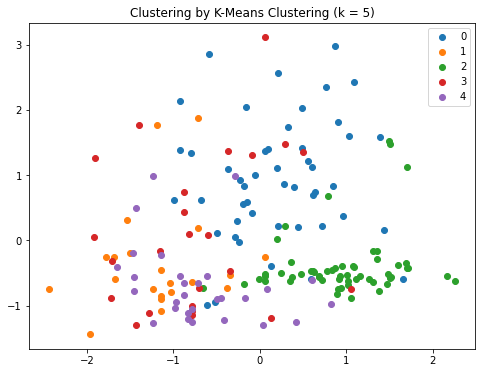

In [ ]:
# getting the KMeans scatter plot
KMeans_pred = clusterer.labels_
KMeans_clust = np.unique(KMeans_pred)

plt.figure(figsize = (8, 6))
for cluster in KMeans_clust:
    row_ix = np.where(KMeans_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by K-Means Clustering (k = 5)")
plt.legend()
plt.show()

In [ ]:
# getting the optimum value of k for our KMeans model using the Elbow Method
Error = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i).fit(X)
    Error.append(kmeans.inertia_)

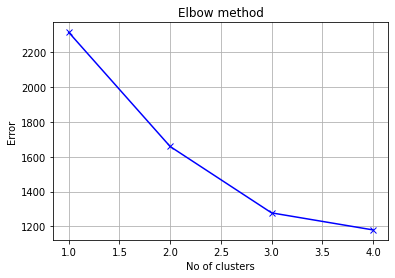

In [ ]:
# visualizing the distribution of errors per number of clusters
plt.plot(range(1, 5), Error, 'bx-')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid(True);

From the above Elbow Method, what cluster number is ideal?

The output graph of the Elbow method is shown above. As we can see, the optimal value of k is 2, as the elbow-like shape is formed at k=2 in the above graph. We can implement k-means again using k = 2.

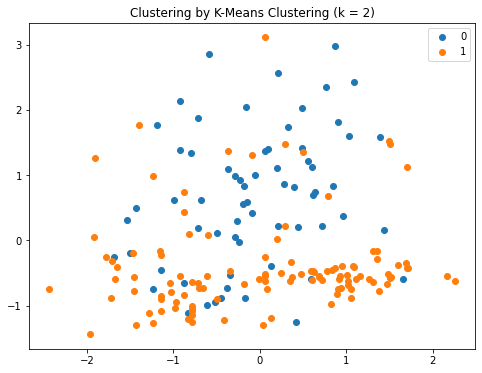

In [ ]:
# if needed, improve your model here and visualize it
kmeans = KMeans(2)
kmeans.fit(X)

kmeans_pred = kmeans.labels_
kmeans_clust = np.unique(kmeans_pred)

plt.figure(figsize = (8, 6))
for cluster in kmeans_clust:
    row_ix = np.where(kmeans_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by K-Means Clustering (k = 2)")
plt.legend()
plt.show()

Does the visualization of your model with the new value of k look better than the original one?

Yes it is much better than the previous one.

In [ ]:
# add these cluster labels to our dataset

df["cluster"] = kmeans_pred

# previewing a sample of our dataset
df.head()



,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### 4.2 Hierarchical Agglomerative Clustering

In [ ]:
# fitting agglomerative clustering with 5 clusters
from sklearn.cluster import AgglomerativeClustering as AC

agglo_clusterer = AC().fit(X) 

# get the labels
labels = agglo_clusterer.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

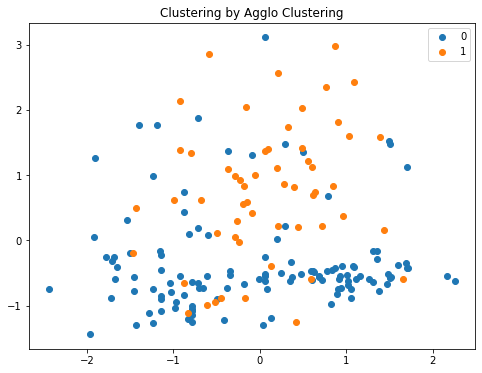

In [ ]:
# Creating a scatter plot of the cluster analysis
pred = agglo_clusterer.labels_
clust = np.unique(pred)

plt.figure(figsize = (8, 6))
for cluster in clust:
    row_ix = np.where(pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by Agglo Clustering")
plt.legend()
plt.show()

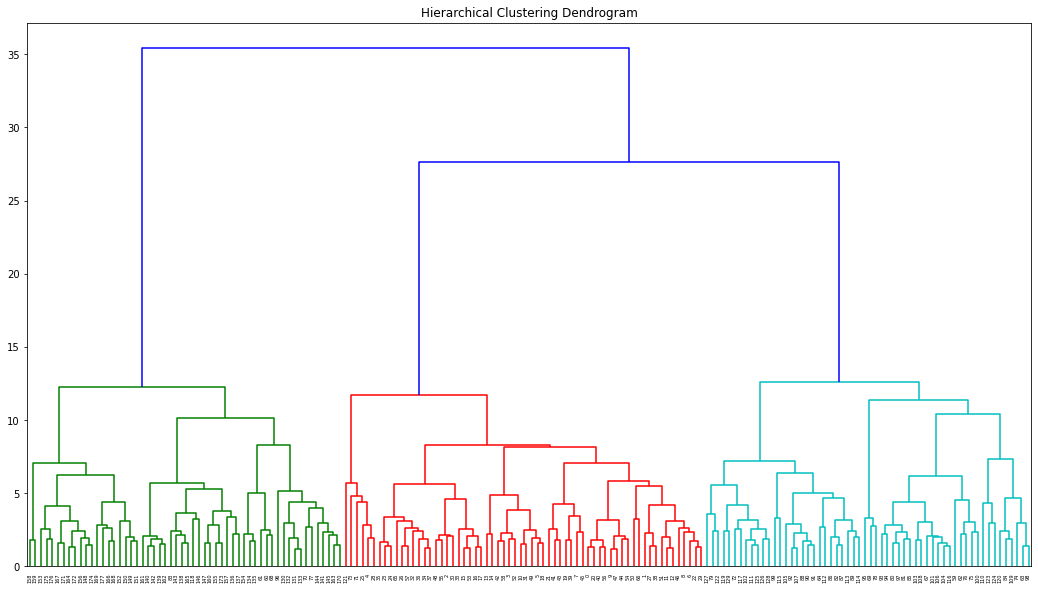

In [ ]:
# creating a dendrogram of our agglomerative clustering analysis
from scipy.cluster import hierarchy as shc

plt.figure(figsize=(18, 10))
plt.title("Hierarchical Clustering Dendrogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

What an you deduce from the dendrogram?

Three clusters are made by using this Agglomerative approach.

In [ ]:
# improve your agglomerative clustering model

agglo_clusterer = AC(n_clusters=2, affinity='euclidean', linkage='ward')
agglo_clusterer.fit(X)

AgglomerativeClustering()

In [ ]:
# get the labels
labels = agglo_clusterer.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
# adding to our dataset
df['agg_cluster_labels'] = labels

# previewing a sample of our dataset
df.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster,agg_cluster_labels
50,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.120,2.91,1150,1,0
70,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870,0,1
93,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.150,3.30,290,1,0
167,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.720,1.75,685,0,1
66,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.120,3.18,502,1,0


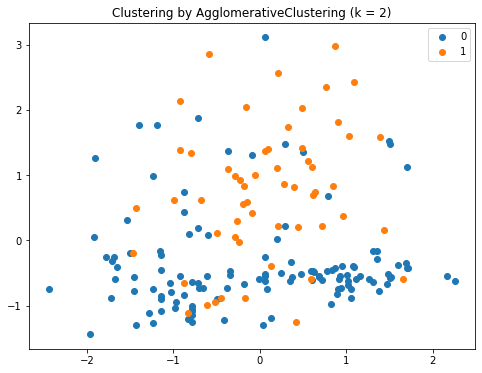

In [ ]:
# Creating a scatter plot of the cluster analysis
# Creating a scatter plot of the cluster analysis
AggClustering_pred = agglo_clusterer.labels_
AggClustering_clust = np.unique(AggClustering_pred)

plt.figure(figsize = (8, 6))
for cluster in AggClustering_clust:
    row_ix = np.where(AggClustering_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by AgglomerativeClustering (k = 2)")
plt.legend()
plt.show()

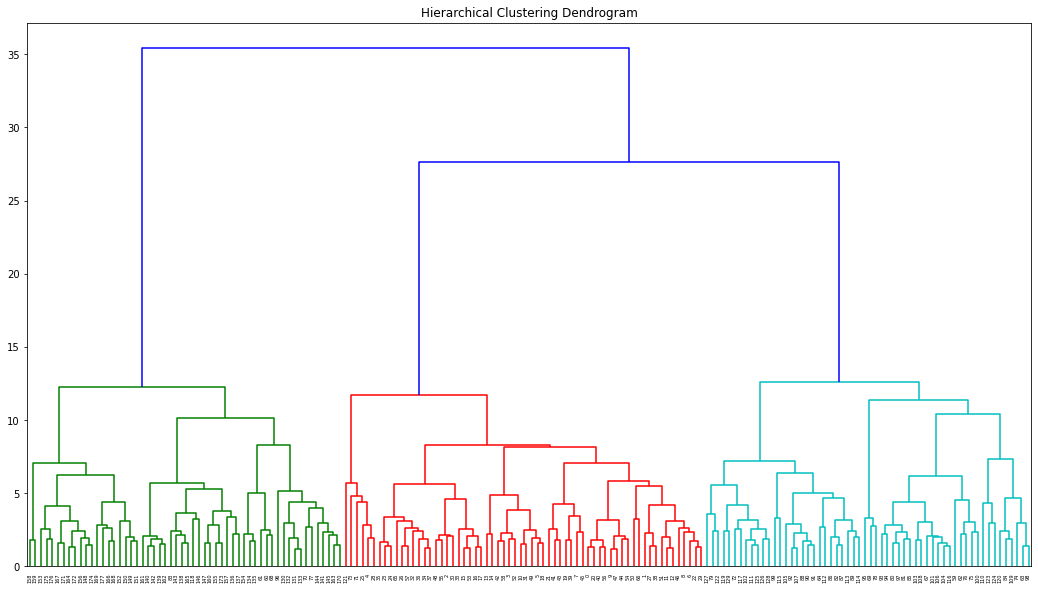

In [ ]:
# creating a dendrogram of our agglomerative clustering analysis
from scipy.cluster import hierarchy

plt.figure(figsize=(18, 10))
plt.title("Hierarchical Clustering Dendrogram")
dend = hierarchy.dendrogram(hierarchy.linkage(X, method='ward'))

Is your agglomerative model with a new value for k better than the first one?

No

## <font color='#2F4F4F'>5. Summary of Findings</font>

What are your findings?

Kmeans clustering is performing good and its performance is measureable to some extent but for Agglomerative there is no best method to evaluate this model.

Data is really scattered and can't be made perfect clusters.

## <font color='#2F4F4F'>6. Recommendations</font>

What do you recommend?

Try to use some other clustering method 

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
  yes

#### b) Did we have the right data?
yes


#### c) What can be done to improve the solution?